<a href="https://colab.research.google.com/github/y4c6/master_thesis/blob/main/EJMR_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

受夠自己亂七八糟的檔案，放過來整理。

# 這些變數名稱需要心情不錯的時候整理一次

# 套件

In [1]:
from google.colab import drive
# directory
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import json

# 準備 dataset

# 合併json檔案

## 合併檔案 ( 從 EJMRpostXX.json 到 EJMRpost_XX_XX.json )

不是每次都要跑這個

In [ ]:
import glob
import json

def list_json_files(path, start_with): 
    # get a list of json files that starts with specific word 
    json_files = glob.glob(path + f'/{start_with}*.json')
    return json_files

def concat_json_files(file_paths):
    # concatenate the content of all the files in the list
    data = {'topic':[], 'posts':[]}
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            file_data = json.load(f)
            data['topic'].extend(file_data['topic'])
            data['posts'].extend(file_data['posts'])
    return data

def concat_json_files_with_start(path, start_with):
    json_files = list_json_files(path, start_with)
    data = concat_json_files(json_files)
    return data

In [ ]:
path = '/content/gdrive/MyDrive/論文相關材料/'
start_with = 'EJMRpost_'

data = concat_json_files_with_start(path, start_with)

In [ ]:
## 確認合併成功
len(data['topic'])

## 合併檔案 ( 從 EJMRpost_XX_XX.json 到 data: dict )

In [3]:
with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_1_10.json', 'r') as f:
    file1 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_11_20.json', 'r') as f:
    file2 = json.load(f)

In [4]:
def concat_json_files(files: list):
    # concatenate the file in the lists
    data = {'topic':[], 'posts':[]}
    for file in files:
      data['topic'].extend(file['topic'])
      data['posts'].extend(file['posts'])
    return data

In [5]:
data = concat_json_files([file1, file2])

In [6]:
## 確認合併成功
len(data['topic'])

150000

# 將檔案轉成表格 (從 data: dict 到 df: pd.df)

In [7]:
df = pd.DataFrame(data)
df.head(3)

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...


# 準備 y, X

## 準備 y ( 利用condition()挑出 df.topic 中包含 關鍵字 的 df.posts(列) )

### 準備 df.Target ( asia+china -> china -> asia)

In [8]:
asia_target = ['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong']
china_target = ['china', 'chinese']

In [10]:
both_target = asia_target + china_target
print(both_target)

['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'china', 'chinese']


In [13]:
# Defining all the conditions inside a function
def condition(x):
    if any( word in x for word in asia_target) and any( word in x for word in china_target): #series.str.contains('Mel').any()
        return "both"
    elif any( word in x for word in asia_target):
        return "asia"
    elif any( word in x for word in china_target):
        return "china"
    else:
        return "other"
 
# Applying the conditions
df['Target'] = df['topic'].apply(condition)
df.head(3)

,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


### 準備 df.y

In [20]:
df = df.drop(df[df['Target'] == 'other'].index)
df.head(3)

,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


In [21]:
df.Target.shape

(4237,)

In [17]:
df.Target[df.Target == 'both'].shape

(158,)

In [18]:
df.Target[df.Target == 'china'].shape

(2683,)

In [19]:
df.Target[df.Target == 'asia'].shape

(1396,)

In [22]:
1396+2683+158

4237

In [25]:
df.groupby('Target').size()

Target
asia     1396
both      158
china    2683
dtype: int64

❓ what is the proper way to do with 'both'?

In [23]:
df['y'] = df['Target'].apply(lambda x: 1 if x == 'china' else 0)
df.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,0
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1


### y的視覺化 

<AxesSubplot:title={'center':'Ratio of labels'}, ylabel='Target'>

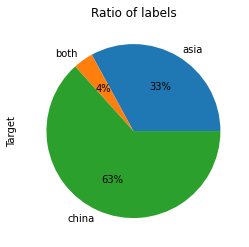

In [40]:
df.groupby('Target').size().plot(kind = 'pie',
                subplots = False,
                ylabel = 'Target',
                autopct = '%1.0f%%',
                title = 'Ratio of labels')

## 準備 X (做 NLP 前處理， Stemming/Lemmatization)

In [41]:
import nltk
nltk.download('punkt') #this is download for tonkenizer
nltk.download('wordnet')  # this is download for lemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')  # this is download for lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# 寫 Preprocessor 的 params functions

In [42]:
import string
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess text
def preprocess_text(text):
  # Lowercase all characters
  text = text.lower()

  # Remove non-English sentences
  pattern = re.compile(r'[^\x00-\x7F]+')
  text = re.sub(pattern, '', text)

  # Remove URLs
  text = re.sub(r'https?://\S+', '', text)

  # Remove digits
  text = text.translate(str.maketrans('', '', string.digits))

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  return text


# Define a function to tokenize and remove stopwords from text and stemmer
def stemmer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Stem the tokens
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens]

  return tokens


# Define a function to tokenize and remove stopwords from text and lemmatize
def lemmatizer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  return tokens


In [43]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
df['stemmed_tokenized'] = df['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
df['lemmatized_tokenized'] = df['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
df[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,0,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


## 得到經過 cv 的 BOW

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
cv = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

## Word2Vec (和 目標字 有關的w2v)

In [46]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

In [47]:
gensim.__version__

'3.6.0'

In [49]:
corpus_lemmatized = df['lemmatized_tokenized'].values
corpus_stemmed = df['stemmed_tokenized'].values

In [ ]:
topn = 30

In [85]:
## model
word2vec_lemmatized = Word2Vec(sentences=corpus_lemmatized, size=vector_dim) 
#, window=window_size, min_count=min_count, epochs=training_epochs)

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_lemmatized.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']).head())
  print('-------')

asian
       Word      Sims
0     white  0.808195
1       azn  0.802681
2     whyte  0.793247
3  hispanic  0.781170
4      azns  0.776111
-------
asia
        Word      Sims
0  southeast  0.865049
1     africa  0.858694
2    eastern  0.847966
3     middle  0.828033
4       east  0.817795
-------
korea
                Word      Sims
0             skorea  0.823026
1           nintendo  0.796652
2                sea  0.794174
3                 sk  0.788036
4  hahahahahahahahah  0.786387
-------
korean
         Word      Sims
0    japanese  0.897900
1       hanzi  0.805694
2        racm  0.791243
3        tall  0.778162
4  vietnamese  0.758062
-------
japan
       Word      Sims
0    skorea  0.852901
1        sk  0.849804
2  nintendo  0.843719
3     north  0.828168
4   vietnam  0.824383
-------
japanese
       Word      Sims
0    korean  0.897900
1     hanzi  0.842920
2   kdramas  0.816759
3  speaking  0.806556
4  arubaito  0.779993
-------
taiwan
           Word      Sims
0  independence 

In [89]:
## model
word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, size=vector_dim) 
#, window=window_size, min_count=min_count, epochs=training_epochs)

# Because the corpus are stemmed, so my key  words also need to be stemmed
stemmer = PorterStemmer()

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_stemmed.wv.most_similar( stemmer.stem(word), topn=topn), columns=['Word', 'Sims']).head())
  print('-------')

asian
     Word      Sims
0     azn  0.841597
1   white  0.803778
2   whyte  0.767397
3  hispan  0.767043
4   black  0.754069
-------
asia
        Word      Sims
0    eastern  0.872312
1  southeast  0.867077
2     africa  0.848310
3   european  0.840763
4       east  0.835890
-------
korea
       Word      Sims
0       rok  0.800498
1        sk  0.794106
2  carolina  0.786858
3       sea  0.783504
4  nintendo  0.777050
-------
korean
        Word      Sims
0    japanes  0.871029
1  vietnames  0.797829
2       tall  0.737800
3  malaysian  0.719304
4     anchor  0.706008
-------
japan
       Word      Sims
0        sk  0.820680
1     south  0.794335
2  nintendo  0.792207
3   germani  0.789322
4   vietnam  0.779057
-------
japanese
        Word      Sims
0     korean  0.871029
1  vietnames  0.775744
2   arubaito  0.752038
3      hanzi  0.736778
4     german  0.736189
-------
taiwan
       Word      Sims
0  independ  0.895433
1     invad  0.792920
2       roc  0.780966
3     invas  0.77779

## 將 目標字 移出 BOW 得到 X

In [ ]:
# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (asia_target + china_target)]

# Applying the conditions
data['lemmatized_cleaned'] = data['lemmatized_tokenized'].apply(remove_target)
data['stemmed_cleaned'] = data['stemmed_tokenized'].apply(remove_target)
data.head(3)

# 真正要跑的部分

說點什麼

## 先跑一次 Lasso，將非零的字詞當作 DoubleML 中的 Treatment

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV()
clf.fit(posts_matrix, np.array([1]* len(asian_topic_idx)))
print(clf.coef_[:10])

In [ ]:
clf.coef_[clf.coef_!=0]

## 跑 DoubleML (根據上面得到的 Treatment 和 Control)

In [ ]:
!pip install -U DoubleML

In [ ]:
import doubleml as dml
from sklearn.base import clone

learner = Lasso(alpha=0.1)

ml_l = clone(learner)

ml_m = clone(learner)

### 使符合套件要求的資料格式

In [ ]:
data_stem = pd.concat([df.y, stemmed_df], ignore_index=True, sort=False)
data_stem.rename(columns={0: 'y'}, inplace=True)
data_stem = data_stem.fillna(0)
data_stem.head(3)

In [ ]:
print(list(stemmed_df.columns[np.nonzero(lasso_stem.coef_)]))

In [ ]:
DoubleMLClusterData.from_arrays(x, y, d, cluster_vars, z)

In [ ]:
obj_dml_data = dml.DoubleMLData(data_stem,
                y_col = 'y',
                d_cols = list(stemmed_df.columns[np.nonzero(lasso_stem.coef_)])
                )

dml_plr_obj = dml.DoubleMLPLR(obj_dml_data, ml_l, ml_m)

dml_plr_obj.fit();

print(dml_plr_obj)

### APE 和 CI

但其實APE好像不行捏

### 看看 stemming 和 lemmatization 的 CI ，用誰?